# <center>M1 : Physical oceanography</center>
 ## <center>Practical 1: Munk and Stommel models</center>
 #### <right>Pablo Fernandez Fernandez (pablo.fernandez@lmd.ipsl.fr) and Juliette Mignot (juliette.mignot@loean.ipsl.fr</right>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import spoisson
import matplotlib

In [29]:
font = {'family' : 'Helvetica',
        'size'   : 22}
matplotlib.rc('font', **font)

### Definition of the characteristic variables of the system

In [4]:
#Characteristics of the bassin 
lat=30 #latitude in °
L=5000000 # in m
H=3000 #width in m
Vc=0.01 
T=L/Vc

#Constant
g=10 #gravitational constant in m/s^2
Rt = 6365000 #Earth's radius in m
f0 = 2*(2*np.pi/(24*3600))*np.sin(lat*np.pi/180) #Coriolis parameter in s^-1

### Friction parameter for Munk and Stommel 

Change the variable *model* to 'Munk' or 'Stommel' to switch from one to the other.

In [5]:
models = ['Munk','Stommel']
model = 'Stommel'

if model == 'Munk':
    print("You chose Munk's model.")
    epsilon_s =  0 # Stommel
    epsilon_m = 1e-5 # Munk
else : 
    if model != 'Stommel':
        print("Please choose either 'Munk' or 'Stommel' !")
    else :
        print("You chose Stommel's model.")
        epsilon_s =  1e-2 # Stommel
        epsilon_m = 0 # Munk

You chose Stommel's model.


### Stream function

The stream function is solved by combining
$\beta v =  \frac{f}{H}\nabla \times \left( \frac{\tau}{\rho_0 f}\right) - r\zeta$ and
$\beta v =  \frac{f}{H}\nabla \times \left( \frac{\tau}{\rho_0 f}\right)  + A_h\nabla^2\zeta $ into a non-dimensional equation of the form $\frac{\partial \psi}{\partial x} + \epsilon_S\nabla^2\psi - \epsilon_M\nabla^4 \psi = wnd $.

##### Compute a square grid to start (NxN)

In [9]:
N = 100
dx = 1/N
x = np.linspace(dx,1-dx,N)
y = np.linspace(dx,1-dx,N)
xx,yy = np.meshgrid(x,y)

##### Wind forcing

In [10]:
rhs = np.sin(np.pi*yy)

##### Friction term

Depends if *model* is 'Munk' or 'Stommel'.

In [11]:
A = spoisson.poisson2d(N)
A = epsilon_s*A/dx**2 - epsilon_m*A*A/dx**4

##### $\beta v$ term

In [311]:
B = A.tocsr()
for j in range(0,N):
  for i in range(1,N-1):
    k = i + N*j
    B[k,k+1] += 0.5/dx
    B[k,k-1] -= 0.5/dx
    
  # Boundaries
  k = N*j
  B[k,k+1]   += 0.5/dx
  k = N-1 + N*j
  B[k,k-1] -= 0.5/dx

##### Solving linear systerm and computing $\psi$

In [312]:
sol = - spoisson.sol(rhs, mat=B) #dimensionless
psi = sol*L*L/T #dimension added 
dX = dx * L #dimension added

##### Plot $\psi$

Text(0.5, 1.0, "Stream function $\\psi$ in Stommel's model")

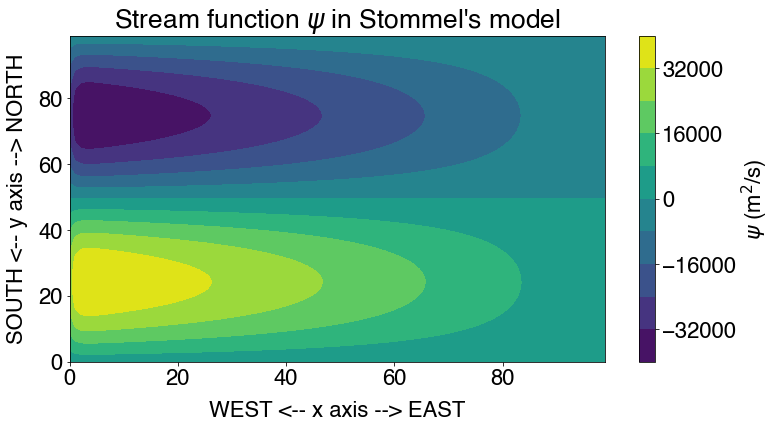

In [313]:
plt.figure(figsize=(12,6))
plt.contourf(psi,10)
plt.xlabel('WEST <-- x axis --> EAST',labelpad=10)
plt.ylabel('SOUTH <-- y axis --> NORTH',labelpad=10)
cb = plt.colorbar()
cb.ax.set_ylabel('$\psi$ (m$^2$/s)',rotation=90)
plt.title("Stream function $\psi$ in {}'s model".format(model))